<a href="https://colab.research.google.com/github/batmanvane/complex-systems-modeling/blob/main/notebooks/04_Discrete_Time_Dynamical_Systems_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# Discrete-Time Dynamical Systems — Five Worked Examples


**How to use this notebook**
- Run each cell top-to-bottom.
- Adjust parameters in the parameter cells and re-run the simulation cells.
- Each example provides a minimal, robust simulation and a plot — no extra libraries required beyond NumPy and Matplotlib.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# For reproducibility (when randomness is involved)
np.random.seed(42)

# NOTE: When making charts in this course:
# 1) We use matplotlib (not seaborn),
# 2) Each chart gets its own plot (no subplots),
# 3) We do not specify colors or styles unless explicitly required.



## Example 1 — Linear Difference Equation

A simple linear discrete-time system:
$$ x_{t} = a\,x_{t-1} + b $$

- Fixed point (if $ a \neq 1$): $x^* = \frac{b}{1-a}$
- Stable if $|a| < 1$ (converges to $x^*$).


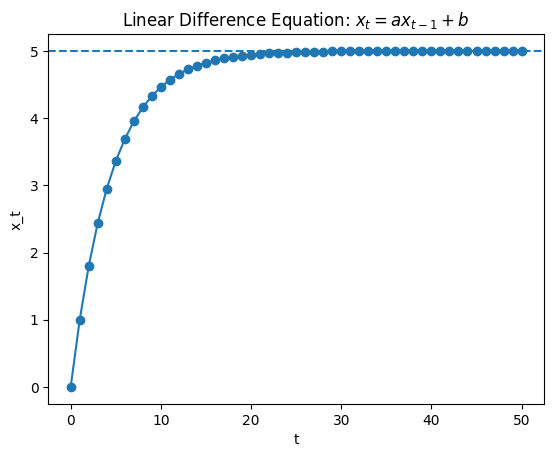

In [2]:

# Parameters (feel free to change)
a = 0.8     # growth/decay factor
b = 1.0     # constant input
x0 = 0.0    # initial condition
T = 50      # number of steps

# Simulation
x = np.zeros(T+1)
x[0] = x0
for t in range(1, T+1):
    x[t] = a * x[t-1] + b

# Theoretical fixed point (if a != 1)
x_star = None
if abs(a - 1.0) > 1e-12:
    x_star = b / (1.0 - a)

# Plot: time series
plt.figure()
plt.plot(range(T+1), x, marker='o')
if x_star is not None:
    plt.axhline(x_star, linestyle='--')
plt.xlabel('t')
plt.ylabel('x_t')
plt.title('Linear Difference Equation: $x_t = a x_{t-1} + b$')
plt.show()



## Example 2 — Logistic Map

Population growth with saturation:
$$ x_{t+1} = r\,x_t (1 - x_t) $$

- $0 < x_0 < 1$, $0 < r \le 4$.
- Depending on $r$: convergence to a fixed point, periodic cycles, or chaos.


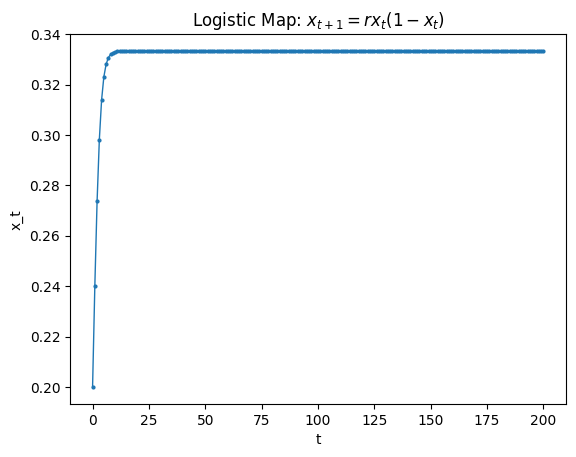

In [11]:

# Parameters (feel free to change)
r = 1.5        # growth parameter
x0 = 0.2       # initial population (0,1)
T = 200        # number of steps

# Simulation
x = np.zeros(T+1)
x[0] = x0
for t in range(T):
    x[t+1] = r * x[t] * (1.0 - x[t])

# Plot: time series
plt.figure()
plt.plot(range(T+1), x, marker='o', markersize=2, linewidth=1)
plt.xlabel('t')
plt.ylabel('x_t')
plt.title('Logistic Map: $x_{t+1} = r x_t (1 - x_t)$')
plt.show()



## Example 3 — Damped Pendulum (Discrete-Time Approximation)

Small-angle, damped pendulum in discrete time (explicit Euler):
$$
\theta_{t+1} = \theta_t + \Delta t\,\omega_t, \qquad
\omega_{t+1} = \omega_t + \Delta t\,\big(-\gamma\,\omega_t - \omega_0^2\,\theta_t\big)
$$
where $\omega_0^2 = g/\ell$.

- Without damping ($\gamma=0$): perpetual oscillation (no attractor).
- With damping ($\gamma>0$): converges to $\theta=0, \omega=0$ (stable fixed point).


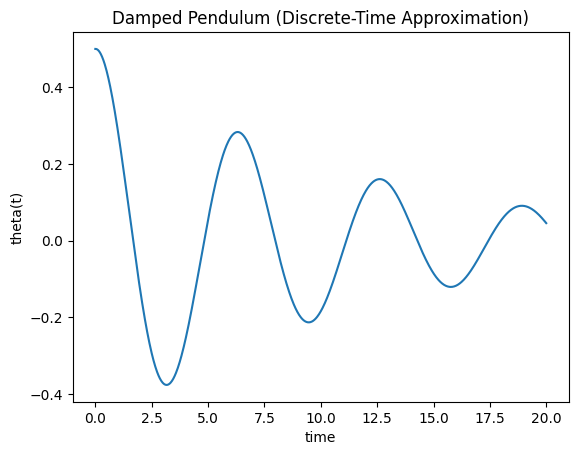

In [12]:

# Parameters (feel free to change)
gamma = 0.2     # damping
omega0 = 1.0    # natural frequency (sqrt(g/l))
dt = 0.02       # time step
T = 1000        # number of steps

theta0 = 0.5    # initial angle (radians)
omega_init = 0.0  # initial angular velocity

# Simulation (explicit Euler)
theta = np.zeros(T+1)
omega = np.zeros(T+1)
theta[0] = theta0
omega[0] = omega_init

for t in range(T):
    theta[t+1] = theta[t] + dt * omega[t]
    omega[t+1] = omega[t] + dt * (-gamma * omega[t] - (omega0**2) * theta[t])

# Plot: theta(t)
time = np.arange(T+1) * dt
plt.figure()
plt.plot(time, theta)
plt.xlabel('time')
plt.ylabel('theta(t)')
plt.title('Damped Pendulum (Discrete-Time Approximation)')
plt.show()



## Example 4 —  Temperature Control (First-Order)

Simple proportional approach to a setpoint:
$$ T_{t+1} = T_t + \Delta t\,k\,(T_{\text{set}} - T_t) $$

- If $0 < \Delta t\,k < 1$, the temperature converges smoothly to $T_{\text{set}}$.
- $T^* = T_{\text{set}}$ is a stable attractor.


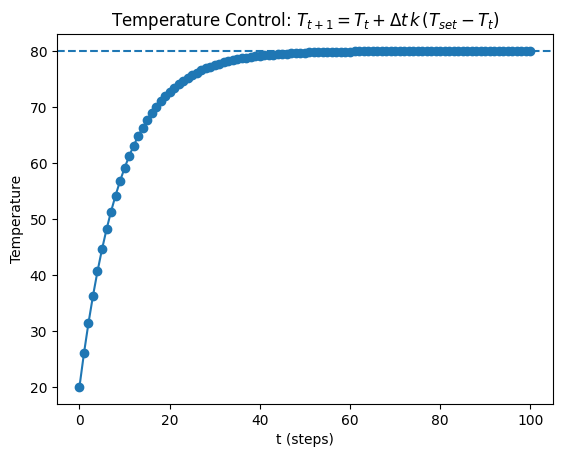

In [13]:

# Parameters (feel free to change)
T_set = 80.0   # desired temperature (e.g., °C)
T0 = 20.0      # initial temperature
k = 0.1        # control/heat transfer gain
dt = 1.0       # time step (seconds or arbitrary)
Tsteps = 100   # number of steps

# Simulation
T_series = np.zeros(Tsteps+1)
T_series[0] = T0
for t in range(Tsteps):
    T_series[t+1] = T_series[t] + dt * k * (T_set - T_series[t])

# Plot
plt.figure()
plt.plot(range(Tsteps+1), T_series, marker='o')
plt.axhline(T_set, linestyle='--')
plt.xlabel('t (steps)')
plt.ylabel('Temperature')
plt.title('Temperature Control: $T_{t+1} = T_t + \Delta t\,k\,(T_{set} - T_t)$')
plt.show()



## Example 5 — Mass–Spring–Damper (Discrete-Time)

Continuous model:
$$ m\ddot{x} + c\dot{x} + kx = F(t) $$

Explicit Euler discretization:
$$ x_{t+1} = x_t + \Delta t\,v_t, \quad
v_{t+1} = v_t + \frac{\Delta t}{m}\big(F_t - c\,v_t - k\,x_t\big) $$

- With damping ($c>0$) and no forcing (or decaying input), the state converges to $x=0, v=0$ — a stable fixed point.


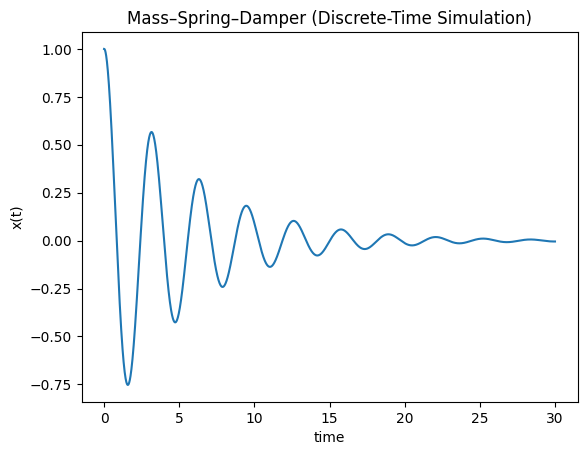

In [14]:

# Parameters (feel free to change)
m = 1.0       # mass
c = 0.4       # damping
k = 4.0       # stiffness
dt = 0.01     # time step
N = 3000      # number of steps

# Initial conditions (e.g., initial displacement, zero velocity)
x0 = 1.0
v0 = 0.0

# Forcing: step input, impulse, or zero. Here we use zero forcing.
def F(t_index, t_value):
    # Example: zero forcing
    return 0.0

# Simulation
x = np.zeros(N+1)
v = np.zeros(N+1)
t = np.linspace(0.0, N*dt, N+1)

x[0] = x0
v[0] = v0

for i in range(N):
    force = F(i, t[i])
    x[i+1] = x[i] + dt * v[i]
    v[i+1] = v[i] + (dt/m) * (force - c*v[i] - k*x[i])

# Plot displacement over time
plt.figure()
plt.plot(t, x)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('Mass–Spring–Damper (Discrete-Time Simulation)')
plt.show()
